In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency


# Ayiti Analytics Probability and Statistics Project

Use all the files to have a final datasets to have the following columns
   <ul>
    <li>questid</li>
    <li>gender</li>
    <li>age (age of applicant)</li>
    <li>communeName (use data prep in commune file)</li>
    <li>application_date (created at in quest file)</li>
    <li>enroll_date (created_at in enroll file)</li>
    <li>is_enroll (Yes/No) (use data prep in enroll file)</li>
    <li>Education Level</li>
   <li>Communication channels(hear_AA1)</li>
    <li>Bootcamp Insterest (after_AA)</li>
    <li>Payement Date (use ord and transaction files)</li>
    <li>Payed (Yes/No)</li>
    <li>list Technologies as columns based (use get_dummies)</li>
    <li>list  Study domains (use get_dummies)</li>
    <li>Job is formal</li>
    <li>Have computer at home</li>
    <li>Have internet at home</li>
    
   </ul>
   

### A.- Data Loading 

In [3]:
commune=pd.read_excel("commune.xlsx")
enroll = pd.read_csv("enroll.csv")
quest = pd.read_csv("quest.csv")
industry = pd.read_csv("industry.csv")
ord = pd.read_csv("ord.csv")
study_domain = pd.read_csv("study_domain.csv")
transaction = pd.read_csv("transaction.csv")
technology = pd.read_csv("technology.csv")

### B.- Data Processing 

In [4]:
quest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          250 non-null    int64 
 1   gender              250 non-null    object
 2   dob                 244 non-null    object
 3   commune             250 non-null    object
 4   created_at          250 non-null    object
 5   modified_at         250 non-null    object
 6   department          249 non-null    object
 7   education_level     250 non-null    object
 8   university          250 non-null    object
 9   study_domain        250 non-null    object
 10  current_employed    250 non-null    object
 11  formal_sector_job   250 non-null    object
 12  have_computer_home  250 non-null    object
 13  internet_at_home    250 non-null    object
 14  hear_AA_1           250 non-null    object
 15  after_AA            250 non-null    object
 16  quest_id            250 no

In [5]:
quest['department'] = quest['department'].apply(lambda x  : str(x))
quest['department']= quest['department'].apply(lambda x : x.upper())
quest['commune']= quest['commune'].apply(lambda x : x.upper())


fst_set=pd.merge(quest,commune, how = 'left', left_on=['department','commune'], right_on=['ADM1_PCODE','Commune_Id'])
fst_set.head()

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,...,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],...,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,NaN,NaN,NaN,NaN,NaN
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],...,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
2,2,male,17/05/1996,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],...,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
3,3,male,24/11/1996,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",...,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
4,4,male,20/07/1997,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],...,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01


In [6]:

transaction['Paid'] = 'Yes'
ord['Paid'] = 'Yes'

trans = transaction.loc[:,['Paid','user_id','created_at']]
order = ord.loc[:,['Paid','user_id','created_at']]
trs_ord= pd.concat([trans,order],axis=0)
trs_ord= trs_ord.rename(columns={'created_at': 'Payment_Date'})
trs_ord.head()

,Paid,user_id,Payment_Date
0,Yes,40976440,2021-03-08T05:08:50.832Z
1,Yes,41179271,2021-03-08T17:26:35.841Z
2,Yes,40973512,2021-03-08T18:52:09.147Z
3,Yes,41177453,2021-03-08T19:06:32.837Z
4,Yes,40797121,2021-03-08T22:10:00.796Z


In [7]:
enroll.head()
enroll= enroll.rename(columns={'created_at': 'enroll_date'})
enroll['is_enroll'] = 'Yes'

snd_set=pd.merge(enroll,trs_ord, how = 'left',on = ['user_id'] )
snd_set= snd_set.loc[:,['user_id','quest_id','enroll_date','Paid','Payment_Date','is_enroll']]
snd_set

trd_set=pd.merge(left=fst_set,right=snd_set, how = 'left', on=['quest_id'])
trd_set['is_enroll']= trd_set['is_enroll'].fillna('no')
trd_set['Paid']= trd_set['Paid'].fillna('no')
trd_set.head()

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,...,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE,user_id,enroll_date,Paid,Payment_Date,is_enroll
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],...,NaN,NaN,NaN,NaN,NaN,39726355.0,2021-02-14T23:15:19.500Z,no,NaN,Yes
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],...,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,NaN,NaN,no,NaN,no
2,2,male,17/05/1996,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],...,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,40117659.0,2021-02-20T21:20:37.450Z,Yes,2021-03-03T23:00:11.974Z,Yes
3,3,male,24/11/1996,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",...,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,NaN,NaN,no,NaN,no
4,4,male,20/07/1997,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],...,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,NaN,NaN,no,NaN,no


In [8]:
study_domain_dum = pd.get_dummies(data=study_domain[["quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
study_domain_dum=study_domain_dum.groupby("quest_id").sum()
study_domain_dum
frth_set=pd.merge(left=trd_set,right=study_domain_dum, how = 'left', on=['quest_id'])
frth_set

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,...,is_enroll,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],...,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,male,17/05/1996,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,male,24/11/1996,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",...,no,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,male,20/07/1997,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],...,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,male,15/02/1994,HT0621,2021-03-02T18:39:19.873194Z,2021-03-02T18:39:19.873237Z,HT06,Bachelors (bacc +4),other,['other'],...,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
246,246,male,08/10/1990,HT0621,2021-03-10T04:12:49.436154Z,2021-03-10T04:12:49.436213Z,HT06,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['item8'],...,no,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
247,247,male,28/12/1993,HT0621,2021-03-14T15:29:32.474015Z,2021-03-14T15:29:32.474055Z,HT06,Bachelors (bacc +4),Centre de Techniques de Planification et d'Eco...,['item2'],...,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
248,248,male,17/04/1992,HT0412,2021-03-08T16:35:07.806100Z,2021-03-08T16:35:07.806161Z,HT04,Bachelors (bacc +4),other,['item1'],...,Yes,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
tchnlg = pd.get_dummies(data=technology[["quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
tchnlg=tchnlg.groupby("quest_id").sum()
tchnlg
fifth_set=pd.merge(left=frth_set,right=tchnlg, how = 'left', on=['quest_id'])
fifth_set
fifth_set.columns
columns_drop= ['Unnamed: 0','modified_at','current_employed','Commune_Id','Commune_FR','ADM1_PCODE','study_domain','department','university','commune']
last_set= fifth_set.drop(labels=None,columns=columns_drop, level=None, inplace=False)
last_set.columns

Index(['gender', 'dob', 'created_at', 'education_level', 'formal_sector_job',
       'have_computer_home', 'internet_at_home', 'hear_AA_1', 'after_AA',
       'quest_id', 'Commune_en', 'Departement', 'user_id', 'enroll_date',
       'Paid', 'Payment_Date', 'is_enroll', 'Accounting', 'Computer Science',
       'Economics', 'Electrical Engineering', 'Law', 'Management', 'Medicine',
       'Statistics', 'other_x', 'Bash', 'Excel', 'Git', 'Java', 'JavaScript',
       'PHP', 'PowerBI or Tableau', 'Python', 'R', 'SQL', 'VBA', 'other_y'],
      dtype='object')

In [10]:
last_set['dob'] = last_set['dob'].astype(str)

last_set['dob'].replace({'3 aout 1977':'03/08/1977'},inplace = True)
last_set['dob'] = pd.to_datetime(last_set['dob'])

def Calculate_Age(born) :
    today = date(2021, 6, 18)
    return today.year - born.year - ((today.month,today.day)< (born.month,born.day))



last_set['Age'] = last_set['dob'].apply(Calculate_Age)
last_set
lisst=['created_at','enroll_date','Payment_Date']
for i in lisst:
    last_set[i] =last_set[i].apply(lambda x : str(x).split("T")[0])

last_set


,gender,dob,created_at,education_level,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,...,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y,Age
0,male,1998-08-25,2021-02-14,unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0
1,female,1996-09-29,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,24.0
2,male,1996-05-17,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,25.0
3,male,1996-11-24,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,24.0
4,male,1997-07-20,2021-02-16,High School (16 years),unknown,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,male,1994-02-15,2021-03-02,Bachelors (bacc +4),Yes,Yes,Yes,Facebook,Improving my data analysis skills,906b3c84-ce95-11eb-8c2a-7c67a234f601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0
246,male,1990-08-10,2021-03-10,Bachelors (bacc +4),Yes,Yes,Yes,Friend,Improving my data analysis skills,906b3c85-ce95-11eb-9b87-7c67a234f601,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,30.0
247,male,1993-12-28,2021-03-14,Bachelors (bacc +4),Yes,Yes,Yes,Friend,Improving my data analysis skills,906b3c86-ce95-11eb-b6a7-7c67a234f601,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,27.0
248,male,1992-04-17,2021-03-08,Bachelors (bacc +4),unknown,Yes,Yes,Facebook,Improving my data analysis skills,906b65e2-ce95-11eb-8b5c-7c67a234f601,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29.0


In [11]:
cut_agecolumn = last_set.pop('Age')
last_set.insert(2,'Age',cut_agecolumn)
last_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   gender                  250 non-null    object        
 1   dob                     244 non-null    datetime64[ns]
 2   Age                     244 non-null    float64       
 3   created_at              250 non-null    object        
 4   education_level         250 non-null    object        
 5   formal_sector_job       250 non-null    object        
 6   have_computer_home      250 non-null    object        
 7   internet_at_home        250 non-null    object        
 8   hear_AA_1               250 non-null    object        
 9   after_AA                250 non-null    object        
 10  quest_id                250 non-null    object        
 11  Commune_en              248 non-null    object        
 12  Departement             248 non-null    object    

In [12]:
ww=last_set['Age'].value_counts()
display(ww)


 25.0    27
 23.0    23
 26.0    23
 24.0    22
 22.0    19
 27.0    17
 30.0    14
 28.0    14
 29.0    12
 32.0     9
 21.0     8
 33.0     7
 34.0     7
 31.0     5
 37.0     5
 40.0     4
 20.0     4
 38.0     4
 0.0      3
 44.0     3
-1.0      3
 35.0     2
 19.0     2
 45.0     1
 48.0     1
 46.0     1
 39.0     1
 50.0     1
 1.0      1
 36.0     1
Name: Age, dtype: int64

In [13]:

cut_data = last_set[(last_set['Age'] == 1.0) | (last_set['Age'] == 0) |(last_set['Age'] == -1)]
last_set= last_set.drop(index = cut_data.index)
cut_data.reset_index()


,index,gender,dob,Age,created_at,education_level,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,...,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y
0,25,male,2021-02-28,0.0,2021-02-19,High School (16 years),Yes,Yes,Yes,WhatsApp,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,92,male,2021-08-14,-1.0,2021-02-18,Other,unknown,Yes,Yes,Friend,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,176,male,2021-02-18,0.0,2021-02-19,Bachelors (bacc +4),unknown,Yes,No,WhatsApp,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,209,female,2020-01-22,1.0,2021-02-16,Other,unknown,No,No,WhatsApp,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,210,female,2021-05-08,0.0,2021-02-17,Other,unknown,Yes,Yes,ESIH,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,219,male,2021-07-25,-1.0,2021-02-19,Bachelors (bacc +4),unknown,Yes,Yes,Facebook,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,229,male,2021-07-18,-1.0,2021-02-20,Bachelors (bacc +4),Yes,Yes,Yes,Facebook,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
d=last_set['Age'].isna().value_counts()
display(d)
last_set['Age'] = last_set['Age'].fillna(np.round(last_set['Age'].mean(),0))
d=last_set['Age'].isna().value_counts()
display(d)
last_set['Age'].value_counts()

False    237
True       6
Name: Age, dtype: int64

False    243
Name: Age, dtype: int64

25.0    27
23.0    23
26.0    23
24.0    22
28.0    20
22.0    19
27.0    17
30.0    14
29.0    12
32.0     9
21.0     8
34.0     7
33.0     7
31.0     5
37.0     5
20.0     4
40.0     4
38.0     4
44.0     3
19.0     2
35.0     2
45.0     1
46.0     1
50.0     1
39.0     1
48.0     1
36.0     1
Name: Age, dtype: int64

In [15]:
sa= last_set['Age'].mean()

sa= np.round(sa,0)
sa


28.0

In [16]:
cut_data['Age']=cut_data[cut_data['Age'] <= 1] = sa
display(cut_data)
last_set = pd.concat([last_set,cut_data], axis =0 )
last_set['Age'].value_counts()


<ipython-input-16-25173aff97c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data['Age']=cut_data[cut_data['Age'] <= 1] = sa
<ipython-input-16-25173aff97c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data['Age']=cut_data[cut_data['Age'] <= 1] = sa
D:\Ana\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,gender,dob,Age,created_at,education_level,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,...,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y
25,male,2021-02-28 00:00:00,28.0,2021-02-19,High School (16 years),Yes,Yes,Yes,WhatsApp,Mentorship,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,male,2021-08-14 00:00:00,28.0,2021-02-18,Other,unknown,Yes,Yes,Friend,Improving my data analysis skills,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
176,male,2021-02-18 00:00:00,28.0,2021-02-19,Bachelors (bacc +4),unknown,Yes,No,WhatsApp,Training to start my own company,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
209,female,2020-01-22 00:00:00,28.0,2021-02-16,Other,unknown,No,No,WhatsApp,Improving my data analysis skills,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
210,female,2021-05-08 00:00:00,28.0,2021-02-17,Other,unknown,Yes,Yes,ESIH,Improving my data analysis skills,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
219,male,2021-07-25 00:00:00,28.0,2021-02-19,Bachelors (bacc +4),unknown,Yes,Yes,Facebook,Finding a job/internship,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
229,male,2021-07-18 00:00:00,28.0,2021-02-20,Bachelors (bacc +4),Yes,Yes,Yes,Facebook,Improving my data analysis skills,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


25.0    27
28.0    27
23.0    23
26.0    23
24.0    22
22.0    19
27.0    17
30.0    14
29.0    12
32.0     9
21.0     8
34.0     7
33.0     7
31.0     5
37.0     5
20.0     4
40.0     4
38.0     4
44.0     3
19.0     2
35.0     2
45.0     1
46.0     1
50.0     1
39.0     1
48.0     1
36.0     1
Name: Age, dtype: int64

In [17]:
last_set['Age'].isna().value_counts()


False    250
Name: Age, dtype: int64

In [18]:

last_set = last_set.drop(columns=['user_id','dob','Departement'],axis=1)
last_set

,gender,Age,created_at,education_level,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,...,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y
0,male,22.0,2021-02-14,unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,female,24.0,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,male,25.0,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,male,24.0,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,male,23.0,2021-02-16,High School (16 years),unknown,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,male,28.0,2021-02-19,Bachelors (bacc +4),unknown,Yes,No,WhatsApp,Training to start my own company,9067e4c0-ce95-11eb-bebe-7c67a234f601,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
209,female,28.0,2021-02-16,Other,unknown,No,No,WhatsApp,Improving my data analysis skills,9069a205-ce95-11eb-be5a-7c67a234f601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
210,female,28.0,2021-02-17,Other,unknown,Yes,Yes,ESIH,Improving my data analysis skills,9069a206-ce95-11eb-9c6f-7c67a234f601,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
219,male,28.0,2021-02-19,Bachelors (bacc +4),unknown,Yes,Yes,Facebook,Finding a job/internship,9069ddd8-ce95-11eb-b0fb-7c67a234f601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
cols=last_set.iloc[:,16:].columns
for i in cols:
    last_set[i]= last_set[i].fillna(0.0)

last_set=last_set.rename(columns={'created_at': 'Application_date','formal_sector_job':'Job_is_formal','hear_AA_1':'Communication_channel','after_AA':'Bootcamp_interest'})
last_set.columns


Index(['gender', 'Age', 'Application_date', 'education_level', 'Job_is_formal',
       'have_computer_home', 'internet_at_home', 'Communication_channel',
       'Bootcamp_interest', 'quest_id', 'Commune_en', 'enroll_date', 'Paid',
       'Payment_Date', 'is_enroll', 'Accounting', 'Computer Science',
       'Economics', 'Electrical Engineering', 'Law', 'Management', 'Medicine',
       'Statistics', 'other_x', 'Bash', 'Excel', 'Git', 'Java', 'JavaScript',
       'PHP', 'PowerBI or Tableau', 'Python', 'R', 'SQL', 'VBA', 'other_y'],
      dtype='object')

###  1. How many observations and variables are there in the dataset
 

In [20]:
# here your codes
last_set.shape
print('The number of observations in the dataset is:',last_set.shape[0])
print('The number of variables in the dataset is:',last_set.shape[1])

The number of observations in the dataset is: 250
The number of variables in the dataset is: 36


### 2.A Calculate the average age of the observations
   * On the whole dataset
   * On the whole male dataset
   * On all the female dataset
### 2.B Calculate 
   * variance of the whole datatset,male and female
   * kurtosis of the whole datatset,male and female
   * skewness of the whole datatset,male and female
### 2.C Does the age distribution follow a normal distribution 
   

In [21]:
# here your codes
avg=last_set['Age'].mean()
print('The average age of the observations in the whole dataset is', np.round(avg,2), 'years old')
avg_male=last_set[last_set['gender']== 'male'].Age.mean()
print('The average age of the observations for the male is', np.round(avg_male,2), 'years old')
avg_female=last_set[last_set['gender']== 'female'].Age.mean()
print('The average age of the observations for the female is', np.round(avg_female,2), 'years old','\n')

var=last_set['Age'].var()
print('The age variance of the observations in the whole dataset is', np.round(var,2))
var_male=last_set[last_set['gender']== 'male'].Age.var()
print('The age variance of the observations for the male is', np.round(var_male,2))
var_female=last_set[last_set['gender']== 'female'].Age.var()
print('The age variance  of the observations for the female is', np.round(var_female,2),'\n')

kurtosis=last_set['Age'].kurtosis()
print('The kurtosis of the age distribution the whole dataset is', np.round(kurtosis,2))
kurtosis_male=last_set[last_set['gender']== 'male'].Age.kurtosis()
print('The kurtosis of the age distribution for the male is', np.round(kurtosis_male,2))
kurtosis_female=last_set[last_set['gender']== 'female'].Age.kurtosis()
print('The kurtosis of the age distributionfor the female is', np.round(kurtosis_female,2),'\n')

skewness=last_set['Age'].skew()
print('The skewness age of the distribution in the whole dataset is', np.round(skewness,2))
skewness_male=last_set[last_set['gender']== 'male'].Age.skew()
print('The skewness age of the distribution for the male is', np.round(skewness_male,2))
skewness_female=last_set[last_set['gender']== 'female'].Age.skew()
print('The skewness age of the distribution for the female is', np.round(skewness_female,2),'\n')


The average age of the observations in the whole dataset is 27.57 years old
The average age of the observations for the male is 27.79 years old
The average age of the observations for the female is 26.62 years old 

The age variance of the observations in the whole dataset is 29.48
The age variance of the observations for the male is 29.69
The age variance  of the observations for the female is 28.02 

The kurtosis of the age distribution the whole dataset is 2.45
The kurtosis of the age distribution for the male is 2.32
The kurtosis of the age distributionfor the female is 4.07 

The skewness age of the distribution in the whole dataset is 1.42
The skewness age of the distribution for the male is 1.35
The skewness age of the distribution for the female is 1.85 



In [22]:
#Testing the distribution for normality
from scipy.stats import shapiro
print("Shapiro-Wilk Test for whole dataset: ",shapiro(last_set['Age']))
print("Shapiro-Wilk Test for whole dataset: ",shapiro(last_set[last_set['gender']== 'male'].Age))
print("Shapiro-Wilk Test for whole dataset: ",shapiro(last_set[last_set['gender']== 'female'].Age))


Shapiro-Wilk Test for whole dataset:  ShapiroResult(statistic=0.8912177681922913, pvalue=1.9860985685932198e-12)
Shapiro-Wilk Test for whole dataset:  ShapiroResult(statistic=0.9021602869033813, pvalue=2.7778448985493753e-10)
Shapiro-Wilk Test for whole dataset:  ShapiroResult(statistic=0.8126839995384216, pvalue=3.091389999099192e-06)


### the p-value is less than 0.05, so the null hypothesis has rejected it, which means the Age does not look like a Gaussian or normal distribution.

### 3.Display the age frequency disbrution
   * On the whole dataset
   * On the whole male dataset
   * On all the female dataset

Text(0.5, 1.0, 'Age frequency in the whole dataset')

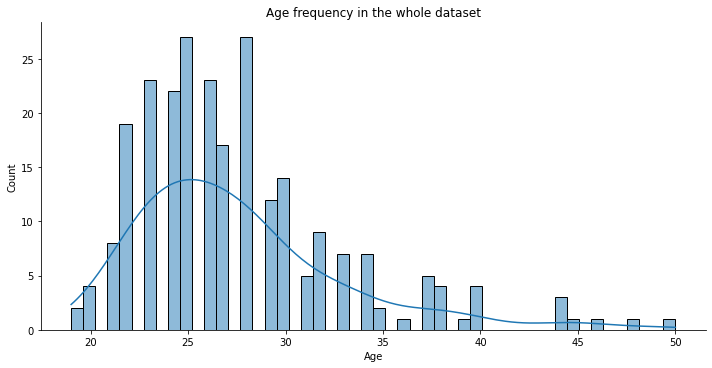

In [23]:
bins = 50
sns.displot(last_set['Age'],bins = bins,kde = True,height=5, aspect=2.0)
plt.title('Age frequency in the whole dataset')

Text(0.5, 1.0, 'Age frequency for the male in the whole dataset')

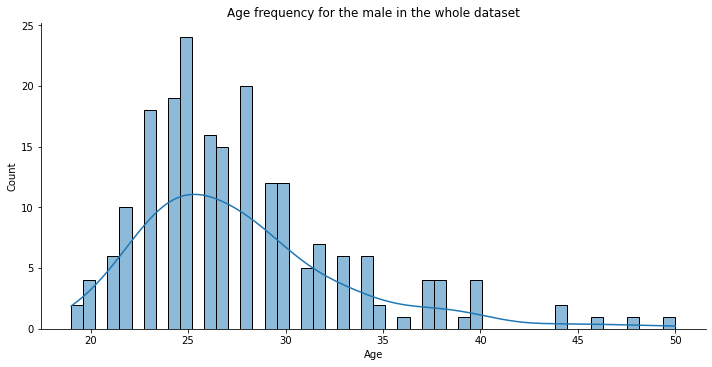

In [24]:
sns.displot(last_set[last_set['gender']== 'male'].Age, bins = bins,kde = True,height=5, aspect=2.0)
plt.title('Age frequency for the male in the whole dataset')

Text(0.5, 1.0, 'Age frequency for the female in the whole dataset')

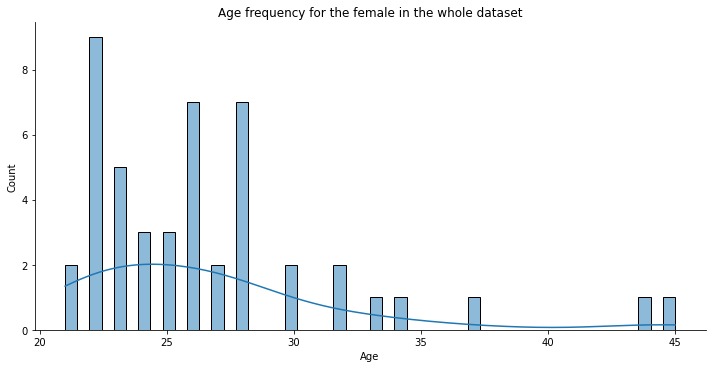

In [25]:
sns.displot(last_set[last_set['gender']== 'female'].Age,bins= bins,kde = True,height=5, aspect=2.0)
plt.title('Age frequency for the female in the whole dataset')

### 4. Can we say that the average age (24 years old) of the observations can be considered as the average age of the population likely to participate in this bootcamp. Justify your answer

In [26]:
#here your codes
# H0 : Mu = 24 
# H1 : Mu != 24
from scipy.stats import wilcoxon
stat, p = wilcoxon(last_set.Age - 24)
print('Statistics=%.2f, p=%.2f' % (stat, p))
# interpretation
alpha = 0.05
if p > alpha:
	print('ho mu=24 (fail to reject H0)')
else:
	print('h1 mu!= 24 (reject H0)')

Statistics=3628.00, p=0.00
h1 mu!= 24 (reject H0)


### the p-value is less than 0.05, so the null hypothesis has rejected it, which means  the average age (24 years old) of the observations can not be considered as the average age of the population likely to participate in this bootcamp

### 5. Calculate the average age of participants for each communication channel

In [27]:
last_set['Age'].groupby(by= last_set['Communication_channel']).mean()

Communication_channel
Ayiti Analytics Website    27.200000
Bootcamp Alumni            26.642857
ESIH                       25.444444
Facebook                   27.775000
Friend                     27.298507
Instagram                  25.400000
LinkedIn                   30.333333
WhatsApp                   28.045455
other                      28.666667
unknown                    22.000000
Name: Age, dtype: float64

### 6. Display an age boxplot for each communication channel

Text(0.5, 1.0, 'Boxplot of applicants by communication channels')

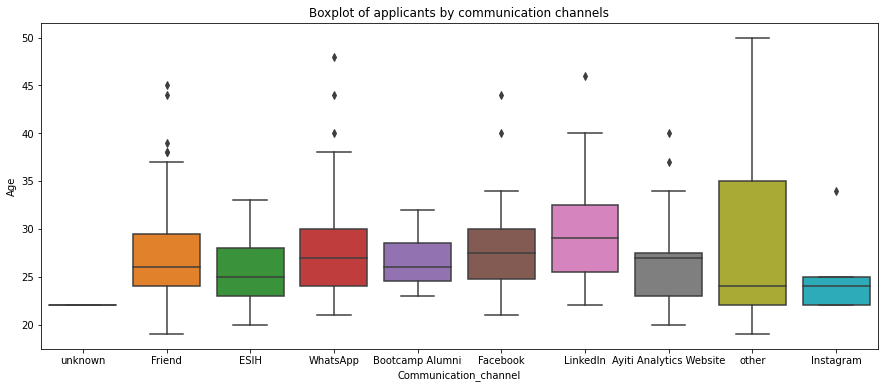

In [28]:
#here your codes
plt.figure(figsize=(15,6))
sns.boxplot(data=last_set,x="Communication_channel",y="Age")
plt.title('Boxplot of applicants by communication channels')


In [29]:
#here your codes
display( last_set['Age'].groupby(by= last_set['Communication_channel']).mean())

Communication_channel
Ayiti Analytics Website    27.200000
Bootcamp Alumni            26.642857
ESIH                       25.444444
Facebook                   27.775000
Friend                     27.298507
Instagram                  25.400000
LinkedIn                   30.333333
WhatsApp                   28.045455
other                      28.666667
unknown                    22.000000
Name: Age, dtype: float64

### 7 .Is there a significant age difference between these groups

In [30]:
Facebook_list_age = last_set[last_set['Communication_channel'] == 'Facebook']['Age'].values
Unknown_list_age = last_set[last_set['Communication_channel'] == 'unknown']['Age'].values
Friend_list_age = last_set[last_set['Communication_channel'] == 'Friend']['Age'].values
ESIH_list_age = last_set[last_set['Communication_channel'] == 'ESIH']['Age'].values
WhatsApp_list_age = last_set[last_set['Communication_channel'] == 'WhatsApp']['Age'].values
Bootcamp_Alumni_list_age = last_set[last_set['Communication_channel'] == 'Bootcamp Alumni']['Age'].values
LinkedIn_list_age = last_set[last_set['Communication_channel'] == 'LinkedIn']['Age'].values
Ayiti_Analytics_Website_list_age = last_set[last_set['Communication_channel'] == 'Ayiti Analytics Website']['Age'].values
other_list_age = last_set[last_set['Communication_channel'] == 'other']['Age'].values
Instagram_list_age = last_set[last_set['Communication_channel'] == 'Instagram']['Age'].values




In [31]:
#here your codes
# Ho : There is no difference between the mean of these groups
# h1 : There is a difference between the mean of these groups

stat, p = f_oneway(Facebook_list_age, Unknown_list_age, Friend_list_age, ESIH_list_age, WhatsApp_list_age, Bootcamp_Alumni_list_age, LinkedIn_list_age, Ayiti_Analytics_Website_list_age, other_list_age, Instagram_list_age)
print(p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted") 


0.34616961613915836
Hypothesis Accepted


### ho is accepted,so the is no significant age difference between these groups

### 8.Plan a BA strategy for each communication channel regarding the age group

# here your codes
## well we will need more information to propose a good ba strategy for each communication channel regarding the age group because people who did mention other for the communication channel have the most effective, and they are between 22 and 35. with the information i have i propose to AA analytics to aim people between 22 and 35 because these are the most people who apply from each channel communication

### 9.According to the observations what is the probability of being in each channel of communication knowing your are a woman

In [33]:
#here your codes
res =last_set.gender.value_counts(normalize=True).to_frame()
display(res)
ress=res.iloc[-1,:]

gender_table = pd.pivot_table(last_set,'Age',index='Communication_channel',columns=['gender'],aggfunc = ['count'],fill_value=0)

my_pivot = gender_table.sort_values(by= ('count','female'),ascending = False)


my_pivot['Probabilty of being woman and being in each communications channels'] =gender_table[('count','female')]/last_set.shape[0]
my_pivot['Probabilty of being male and being in each communications channels'] = gender_table[('count','male')]/last_set.shape[0]
my_pivot=my_pivot.loc[:,['Probabilty of being woman and being in each communications channels','Probabilty of being male and being in each communications channels']]
display(my_pivot)

my_pivot['male'] =my_pivot['Probabilty of being male and being in each communications channels']/ res.loc["male","gender"]
my_pivot['female'] =my_pivot['Probabilty of being woman and being in each communications channels']/ res.loc["female","gender"]

my_pivot.loc[:,['female']] 

,gender
male,0.812
female,0.188


,Probabilty of being woman and being in each communications channels,Probabilty of being male and being in each communications channels
gender,,
Communication_channel,,
Friend,0.044,0.224
WhatsApp,0.036,0.228
Bootcamp Alumni,0.032,0.024
Facebook,0.024,0.136
ESIH,0.020,0.052
Ayiti Analytics Website,0.016,0.044
other,0.008,0.028
Instagram,0.004,0.016


,female
gender,
Communication_channel,
Friend,0.234043
WhatsApp,0.191489
Bootcamp Alumni,0.170213
Facebook,0.127660
ESIH,0.106383
Ayiti Analytics Website,0.085106
other,0.042553
Instagram,0.021277


### 10.According to the observations what is the probability of being in each channel of communication knowing your are a man

In [34]:
#here your codes
my_pivot.loc[:,['male']]

,male
gender,
Communication_channel,
Friend,0.275862
WhatsApp,0.280788
Bootcamp Alumni,0.029557
Facebook,0.167488
ESIH,0.064039
Ayiti Analytics Website,0.054187
other,0.034483
Instagram,0.019704


### 11. Deduce the probability of being a woman knowing each communication channel

In [35]:
#here your codes
communication_table = pd.pivot_table(last_set,'Age',index='Communication_channel',columns='gender',aggfunc = ['count'],fill_value=0,margins = True)
v = communication_table.iloc[:-1,-1].to_frame() 

v[('count','All')] = v[('count','All')]/last_set.shape[0]
v['Probability of being in each channel of communication knowing your are a woman']= my_pivot.loc[:,['female']]
v['Probability of being a woman knowing each communication channels']= (v['Probability of being in each channel of communication knowing your are a woman'] * ress['gender'])/v[('count','All')]
v

,count,Probability of being in each channel of communication knowing your are a woman,Probability of being a woman knowing each communication channels
,All,,
Communication_channel,,,
Ayiti Analytics Website,0.060,0.085106,0.266667
Bootcamp Alumni,0.056,0.170213,0.571429
ESIH,0.072,0.106383,0.277778
Facebook,0.160,0.127660,0.150000
Friend,0.268,0.234043,0.164179
Instagram,0.020,0.021277,0.200000
LinkedIn,0.060,0.021277,0.066667
WhatsApp,0.264,0.191489,0.136364


### 12. Deduce the probability of being a man knowing each communication channel

In [36]:
#here your codes
v = communication_table.iloc[:-1,-1].to_frame()

v[('count','All')] = v[('count','All')]/last_set.shape[0]
v['Probability of being in each channel of communication knowing your are a man']= my_pivot.loc[:,['male']]
v['Probability of being a male knowing each communication channels']= (v['Probability of being in each channel of communication knowing your are a man'] * 0.812)/v[('count','All')]
v


,count,Probability of being in each channel of communication knowing your are a man,Probability of being a male knowing each communication channels
,All,,
Communication_channel,,,
Ayiti Analytics Website,0.060,0.054187,0.733333
Bootcamp Alumni,0.056,0.029557,0.428571
ESIH,0.072,0.064039,0.722222
Facebook,0.160,0.167488,0.850000
Friend,0.268,0.275862,0.835821
Instagram,0.020,0.019704,0.800000
LinkedIn,0.060,0.068966,0.933333
WhatsApp,0.264,0.280788,0.863636


### 15 Display a plot to see Gender vs Communication Channels .Is there any dependency between communication channels and gender?

gender,female,male,All
Communication_channel,,,
Ayiti Analytics Website,4,11,15
Bootcamp Alumni,8,6,14
ESIH,5,13,18
Facebook,6,34,40
Friend,11,56,67
Instagram,1,4,5
LinkedIn,1,14,15
WhatsApp,9,57,66
other,2,7,9


p value: 0.5496916447443122
ACCEPT NULL HYPOTHESIS


<Figure size 360x1080 with 0 Axes>

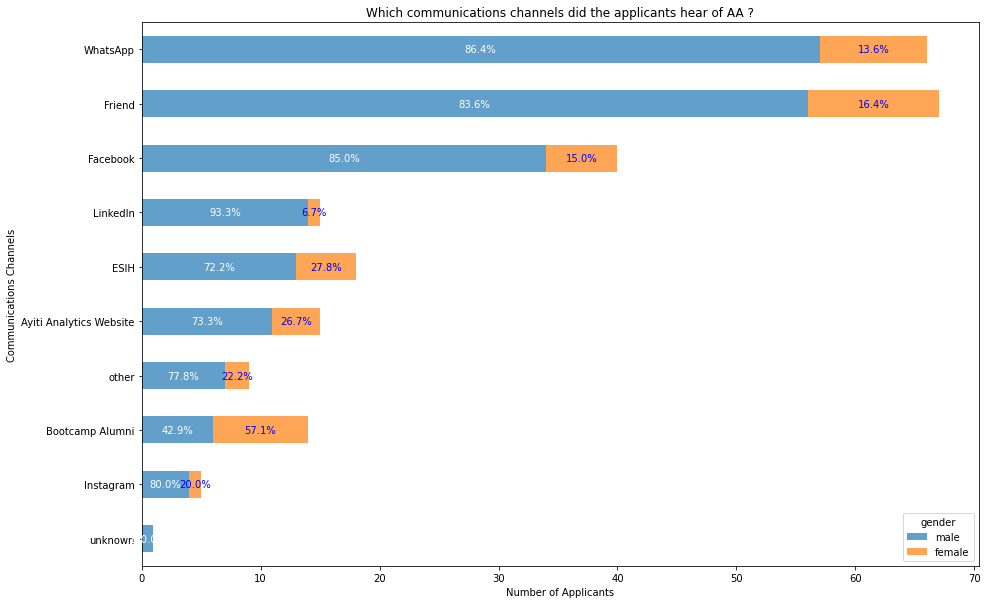

In [37]:
# here your codes
def my_chisqure_test(data=last_set,columns=None,significance_level=0.05,figsize=(5,5),heatmap=False):
  result1  = pd.pivot_table(data=data,index=columns[0],columns=columns[1],values="Age",aggfunc="count",fill_value=0,margins = True)
  display(result1)
  stat, p, dof,s= chi2_contingency(result1) 
  print("p value: " + str(p)) 
  if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
  else: 
    print('ACCEPT NULL HYPOTHESIS') 
  # Force the aspect ratio of the blocks to be equal using "square" parameter
  plt.figure(figsize=figsize)
  if heatmap:
    ax = sns.heatmap(result1,cmap="YlGnBu", linewidths=.5,
    annot=True ,annot_kws={'size':14} ,fmt=".1f" , cbar=True ,square = True)
    plt.yticks(rotation=0)
  else:
    values = result1.iloc[:-1,:].sort_values(by =('male'),ascending=True)
    ax =values.sort_values(by =('male'),ascending=True)[[('male'),('female')]].plot(kind="barh",figsize=(15,10),stacked= True,alpha =0.7)
    ylab = ax.set_ylabel('Communications Channels')
    xlab = ax.set_xlabel('Number of Applicants')
    title = ax.set_title('Which communications channels did the applicants hear of AA ?')

    index =0
    for male, female ,total in zip(values[('male')],values[('female')], values[('All')]):
      if male != total and  female != total  :
        ax.text(male/2 ,
                index,
                str(np.round((male/total)*100,1)) + "%",
                fontdict=dict(color='white',fontsize=10,horizontalalignment="center",verticalalignment="center")
                )
        ax.text(male + female/2 ,
              index,
              str(np.round((female/total)*100,1)) + "%",
              fontdict=dict(color='blue',fontsize=10,horizontalalignment="center",verticalalignment="center")
            )
      elif female == total:
        ax.text(female/2 ,
            index,
            str(np.round((female/total)*100,1)) + "%",
            fontdict=dict(color='blue',fontsize=10,horizontalalignment="center",verticalalignment="center")
          )
      else:
        ax.text(male/2 ,
            index,
            str(np.round((male/total)*100,1)) + "%",
            fontdict=dict(color='white',fontsize=10,horizontalalignment="center",verticalalignment="center")
          )       
   
    
      index+=1
  plt.show()
  
my_chisqure_test(last_set,columns=['Communication_channel','gender'],significance_level=0.05,figsize=(5,15),heatmap=False)  

### The preceding results show that the null hypothesis is accepted with a 95% confidence interval, wich mean there is independency between communication channels and gender?

### 16 Use the same method to display plot and know if is there any dependency between communication channels and Bootcamp Insterest?

In [38]:
# here your codes
def my_chisqure_test(data=last_set,columns=None,significance_level=0.05,figsize=(5,5),heatmap=False):
  result1  = pd.pivot_table(data=data,index=columns[0],columns=columns[1],values="Age",aggfunc="count",fill_value=0,margins = True)
  display(result1)
  stat, p, dof,s= chi2_contingency(result1) 
  print("p value: " + str(p)) 
  if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
  else: 
    print('ACCEPT NULL HYPOTHESIS') 
 
my_chisqure_test(last_set,columns=['Communication_channel','Bootcamp_interest'],significance_level=0.05,figsize=(10,15),heatmap=False)   

Bootcamp_interest,Finding a job/internship,Improving my data analysis skills,Mentorship,Switching careers,Training to start my own company,other,unknown,All
Communication_channel,,,,,,,,
Ayiti Analytics Website,1,9,1,2,2,0,0,15
Bootcamp Alumni,3,8,0,1,1,0,1,14
ESIH,2,12,1,0,2,1,0,18
Facebook,10,20,3,3,4,0,0,40
Friend,10,38,1,4,14,0,0,67
Instagram,2,0,0,1,2,0,0,5
LinkedIn,2,10,0,1,2,0,0,15
WhatsApp,11,29,6,8,11,1,0,66
other,2,4,1,0,1,1,0,9


p value: 1.2931351228431785e-10
Reject NULL HYPOTHESIS


### the p-value is less than 0.05, so the null hypothesis has rejected it, which means there isn't any independency between communication channels and Bootcamp Insterest

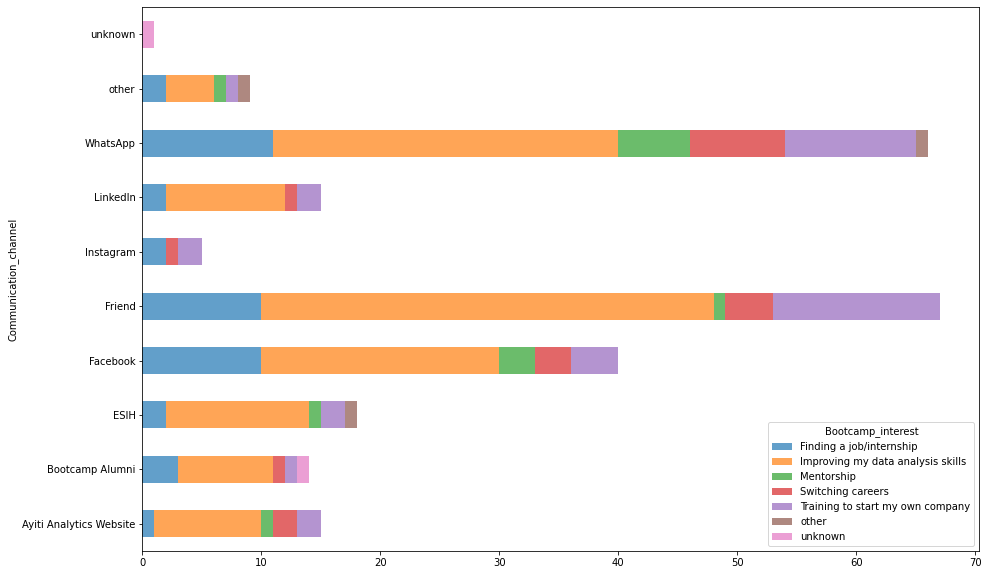

In [39]:
sssa= pd.pivot_table(data=last_set,index='Communication_channel',columns='Bootcamp_interest', values='Age', aggfunc='count', fill_value=0)
sssa.plot(kind="barh",figsize=(15,10),stacked= True,alpha =0.7)
plt.show() 

### 17.Plan a BA  strategy for each communication channel, Bootcamp Insterest regarding the gender 

#here your codes
### as we can see from the graph below people in 



# here your codes
### as we can see from the graph below, people who heard about AA analytics from friend and whats app have the most effective and from them we have the most effective people wich apply for improving their data analysis skills and finding a job. and most of them are male
### so i propose AA analytics to propose more analysis skills and offer job opportunities so they could have more people to apply for the bootcamp


In [1]:
#here your codes
### as we can see from the graph below, people who heard about AA analytics from friend and whats app have the most effective and from them we have the most effective people wich apply for improving their data analysis skills and finding a job


### 19. Calculate 
    * P(Bootcamp Insterest,Communication channels,Gender/Payed=yes)
    * P(Bootcamp Insterest,Communication channels,Gender/Payed=no)

In [40]:
result12  = pd.pivot_table(data=last_set[last_set['Paid'] == 'Yes'],columns='Bootcamp_interest',index=['Paid','Communication_channel','gender'],values="quest_id",aggfunc="count",fill_value=0,margins = True)
result12 = result12 /last_set[last_set['Paid'] == 'Yes'].shape[0]
result12 

Bootcamp_interest                    Finding a job/internship  \
Paid Communication_channel   gender                             
Yes  Ayiti Analytics Website male                    0.015385   
     Bootcamp Alumni         female                  0.015385   
                             male                    0.000000   
     ESIH                    male                    0.015385   
     Facebook                female                  0.000000   
                             male                    0.015385   
     Friend                  female                  0.015385   
                             male                    0.030769   
     Instagram               male                    0.015385   
     LinkedIn                female                  0.000000   
                             male                    0.015385   
     WhatsApp                female                  0.015385   
                             male                    0.046154   
     other                   female                  0.000000   
                             male                    0.000000   
All                                                  0.200000   

Bootcamp_interest                    Improving my data analysis skills  \
Paid Communication_channel   gender                                      
Yes  Ayiti Analytics Website male                             0.015385   
     Bootcamp Alumni         female                           0.015385   
                             male                             0.076923   
     ESIH                    male                             0.030769   
     Facebook                female                           0.030769   
                             male                             0.076923   
     Friend                  female                           0.030769   
                             male                             0.215385   
     Instagram               male                             0.000000   
     LinkedIn                female                           0.015385   
                             male                             0.015385   
     WhatsApp                female                           0.046154   
                             male                             0.046154   
     other                   female                           0.000000   
                             male                             0.015385   
All                                                           0.630769   

Bootcamp_interest                    Mentorship  Switching careers  \
Paid Communication_channel   gender                                  
Yes  Ayiti Analytics Website male      0.000000           0.000000   
     Bootcamp Alumni         female    0.000000           0.015385   
                             male      0.000000           0.000000   
     ESIH                    male      0.000000           0.000000   
     Facebook                female    0.000000           0.000000   
                             male      0.000000           0.000000   
     Friend                  female    0.000000           0.000000   
                             male      0.000000           0.000000   
     Instagram               male      0.000000           0.000000   
     LinkedIn                female    0.000000           0.000000   
                             male      0.000000           0.000000   
     WhatsApp                female    0.000000           0.000000   
                             male      0.000000           0.000000   
     other                   female    0.015385           0.000000   
                             male      0.000000           0.000000   
All                                    0.015385           0.015385   

Bootcamp_interest                    Training to start my own company  \
Paid Communication_channel   gender                                     
Yes  Ayiti Analytics Website male                            0.015385   
     Bootcamp Al

In [41]:
result123  = pd.pivot_table(data=last_set[last_set['Paid'] == 'no'],columns='Bootcamp_interest',index=['Paid','Communication_channel','gender'],values="quest_id",aggfunc="count",fill_value=0,margins = True)
result123 = result123 /last_set[last_set['Paid'] == 'no'].shape[0]
result123 

Bootcamp_interest                    Finding a job/internship  \
Paid Communication_channel   gender                             
no   Ayiti Analytics Website female                  0.000000   
                             male                    0.000000   
     Bootcamp Alumni         female                  0.010811   
                             male                    0.000000   
     ESIH                    female                  0.000000   
                             male                    0.005405   
     Facebook                female                  0.010811   
                             male                    0.037838   
     Friend                  female                  0.016216   
                             male                    0.021622   
     Instagram               female                  0.000000   
                             male                    0.005405   
     LinkedIn                male                    0.005405   
     WhatsApp                female                  0.000000   
                             male                    0.037838   
     other                   female                  0.000000   
                             male                    0.010811   
     unknown                 male                    0.000000   
All                                                  0.162162   

Bootcamp_interest                    Improving my data analysis skills  \
Paid Communication_channel   gender                                      
no   Ayiti Analytics Website female                           0.010811   
                             male                             0.032432   
     Bootcamp Alumni         female                           0.010811   
                             male                             0.000000   
     ESIH                    female                           0.016216   
                             male                             0.037838   
     Facebook                female                           0.000000   
                             male                             0.070270   
     Friend                  female                           0.021622   
                             male                             0.097297   
     Instagram               female                           0.000000   
                             male                             0.000000   
     LinkedIn                male                             0.043243   
     WhatsApp                female                           0.016216   
                             male                             0.108108   
     other                   female                           0.005405   
                             male                             0.010811   
     unknown                 male                             0.000000   
All                                                           0.481081   

Bootcamp_interest                    Mentorship  Switching careers  \
Paid Communication_channel   gender                                  
no   Ayiti Analytics Website female    0.000000           0.005405   
                             male      0.005405           0.005405   
     Bootcamp Alumni         female    0.000000           0.000000   
                             male      0.000000           0.000000   
     ESIH                    female    0.005405           0.000000   
                             male      0.000000           0.000000   
     Facebook                female    0.010811           0.000000   
                             male      0.005405           0.016216   
     Friend                  female    0.000000           0.000000   
                             male      0.005405           0.021622   
     Instagram               female    0.000000           0.000000   
                             male      0.000000           0.005405   
     LinkedIn                male      0.000000           0.005405   
     WhatsApp                

### 20 reduce 
* P(Payed="yes"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",Gender="male")
* P(Payed="no"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",Gender="male")

In [42]:
# here your codes
m = pd.pivot_table(data=last_set,columns='Bootcamp_interest',index=['Communication_channel','gender'],values="quest_id",aggfunc="count",fill_value=0,margins = True)
m=last_set[last_set['Paid'] == 'Yes'].shape[0]/m
g = result12*m
g = g.fillna("-")
display(g)
g.loc[pd.IndexSlice['Friend','male'],'Improving my data analysis skills']


Bootcamp_interest                         All Finding a job/internship  \
Communication_channel   gender Paid                                      
                               All          -                        -   
All                            NaN          -                        -   
Ayiti Analytics Website female NaN          -                        -   
                        male   Yes   0.272727                        1   
Bootcamp Alumni         female Yes      0.375                 0.333333   
                        male   Yes   0.833333                        -   
ESIH                    female NaN          -                        -   
                        male   Yes   0.307692                      0.5   
Facebook                female Yes   0.333333                        0   
                        male   Yes   0.205882                    0.125   
Friend                  female Yes   0.272727                     0.25   
                        male   Yes   0.339286                 0.333333   
Instagram               female NaN          -                        -   
                        male   Yes       0.25                      0.5   
LinkedIn                female Yes          1                        -   
                        male   Yes   0.142857                      0.5   
WhatsApp                female Yes   0.444444                        1   
                        male   Yes   0.157895                      0.3   
other                   female Yes        0.5                        -   
                        male   Yes   0.142857                        0   
unknown                 male   NaN          -                        -   

Bootcamp_interest                   Improving my data analysis skills  \
Communication_channel   gender Paid                                     
                               All                                  -   
All                            NaN                                  -   
Ayiti Analytics Website female NaN                                  -   
                        male   Yes                           0.142857   
Bootcamp Alumni         female Yes                           0.333333   
                        male   Yes                                  1   
ESIH                    female NaN                                  -   
                        male   Yes                           0.222222   
Facebook                female Yes                                  1   
                        male   Yes                           0.277778   
Friend                  female Yes                           0.333333   
                        male   Yes                             0.4375   
Instagram               female NaN                                  -   
                        male   Yes                                  -   
LinkedIn                female Yes                                  1   
                        male   Yes                           0.111111   
WhatsApp                female Yes                                0.5   
                        male   Yes                           0.130435   
other                   female Yes                                  0   
                        male   Yes                           0.333333   
unknown                 male   NaN                                  -   

Bootcamp_interest                   Mentorship Switching careers  \
Communication_channel   gender Paid                                
                               All           -                 -   
All                            NaN           -                 -   
Ayiti Analytics Website female NaN           -                 -   
                        male   Yes           0                 0   
Bootcamp Alumni         female Yes           -                 1   
                        male   Yes           -                 -   
ESIH                    female NaN           -                 -   
     

Paid
Yes    0.4375
Name: Improving my data analysis skills, dtype: object

In [43]:
n = pd.pivot_table(data=last_set,columns='Bootcamp_interest',index=['Communication_channel','gender'],values="quest_id",aggfunc="count",fill_value=0,margins = True)
n=last_set[last_set['Paid'] == 'no'].shape[0]/n
h = result123*n
h = h.fillna("-")
display(h)
h.loc[pd.IndexSlice['Friend','male'],'Improving my data analysis skills']


Bootcamp_interest                   Finding a job/internship  \
Communication_channel   gender Paid                            
                               All                         -   
All                            NaN                         -   
Ayiti Analytics Website female no                          -   
                        male   no                          0   
Bootcamp Alumni         female no                   0.666667   
                        male   no                          -   
ESIH                    female no                          -   
                        male   no                        0.5   
Facebook                female no                          1   
                        male   no                      0.875   
Friend                  female no                       0.75   
                        male   no                   0.666667   
Instagram               female no                          -   
                        male   no                        0.5   
LinkedIn                female NaN                         -   
                        male   no                        0.5   
WhatsApp                female no                          0   
                        male   no                        0.7   
other                   female no                          -   
                        male   no                          1   
unknown                 male   no                          -   

Bootcamp_interest                   Improving my data analysis skills  \
Communication_channel   gender Paid                                     
                               All                                  -   
All                            NaN                                  -   
Ayiti Analytics Website female no                                   1   
                        male   no                            0.857143   
Bootcamp Alumni         female no                            0.666667   
                        male   no                                   0   
ESIH                    female no                                   1   
                        male   no                            0.777778   
Facebook                female no                                   0   
                        male   no                            0.722222   
Friend                  female no                            0.666667   
                        male   no                              0.5625   
Instagram               female no                                   -   
                        male   no                                   -   
LinkedIn                female NaN                                  -   
                        male   no                            0.888889   
WhatsApp                female no                                 0.5   
                        male   no                            0.869565   
other                   female no                                   1   
                        male   no                            0.666667   
unknown                 male   no                                   -   

Bootcamp_interest                   Mentorship Switching careers  \
Communication_channel   gender Paid                                
                               All           -                 -   
All                            NaN           -                 -   
Ayiti Analytics Website female no            -                 1   
                        male   no            1                 1   
Bootcamp Alumni         female no            -                 0   
                        male   no            -                 -   
ESIH                    female no            1                 -   
                        male   no            -                 -   
Facebook                female no            1                 -   
                        male   no            1                 1   
Friend                  female 

Paid
no    0.5625
Name: Improving my data analysis skills, dtype: object

### Based on these findings, propose strategies to increase our sales?

# here your codes
### well as we can see people attemp to enter the bootcamp for improving their data analysis skills and finding a job so they are the group that have most people who pay for the bootcamp , so i propose AA bootcamp to aim for those type of people so they can increase their sales for the bootcamp